In [25]:
import pandas as pd
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

# Scatterplotting

In [73]:
df=pd.read_csv('big_df_allvars.csv')  
df["w_neighs"]=np.where(df['gene'] == "-", np.NaN, df['w_neighs'])

In [75]:
df[["ph_mean","ph_freq","temp_mean","temp_var", "w_neighs", 'exp_level', 'snp_count']]

,ph_mean,ph_freq,temp_mean,temp_var,w_neighs,exp_level,snp_count
0,0.170780,0.088500,0.082051,0.100290,0.0,NaN,2.0
1,0.044451,0.032206,0.042795,0.039529,0.0,NaN,2.0
2,0.033216,0.067741,0.032356,0.081874,NaN,NaN,NaN
3,0.029832,0.032798,0.023595,0.031272,NaN,NaN,NaN
4,0.026539,0.068351,0.026066,0.052231,NaN,NaN,NaN
...,...,...,...,...,...,...,...
61501,0.037263,0.044426,0.041913,0.040002,0.0,NaN,1.0
61502,0.032587,0.091424,0.038413,0.064004,0.0,NaN,1.0
61503,0.128910,0.042086,0.055876,0.045872,0.0,8997.0,1.0
61504,0.057185,0.035645,0.045991,0.101380,0.0,NaN,1.0


In [3]:
genes=df.gene.unique()
genes = genes[genes!='-'] 

In [4]:
names = [x for x in df.columns]
new_df = pd.DataFrame(columns=names)

In [5]:
#i=1
for g in genes:
    temp_df = df[df["gene"]==g]
    maxu=temp_df[["ph_mean","ph_var","temp_mean","temp_var","ph_freq"]].values.max(1)
    new_df = new_df.append(temp_df.iloc[[np.where(maxu==maxu.max())[0][0]]]) 
    #i+=1
    #print(i)

In [72]:
new_df

,index,ch,pos,gene,ph_mean,ph_var,temp_mean,temp_var,ph_freq,ch_num,...,log_ph_mean,log_ph_var,log_temp_mean,log_temp_var,log_ph_freq,neighs,w_neighs,centr,exp_level,snp_count
0,28119,NW_022145612.1,50053666,LOC100888473,0.170780,0.056826,0.082051,0.100290,0.088500,1,...,-0.767563,-1.245453,-1.085916,-0.998742,-1.053057,0,0.0,NaN,NaN,2.0
28114,58778,NW_022145612.1,48652184,LOC582475,0.413070,0.085476,1.471600,0.181120,0.262610,1,...,-0.383976,-1.068156,0.167790,-0.742034,-0.580689,0,0.0,NaN,NaN,10.0
28124,8483,NW_022145612.1,48730374,LOC764414,0.123960,0.354700,0.088905,0.245530,1.719900,1,...,-0.906718,-0.450139,-1.051074,-0.609895,0.235503,0,0.0,NaN,NaN,17.0
28143,28074,NW_022145612.1,48805050,LOC579746,0.032518,0.215860,0.032040,0.068156,0.212980,1,...,-1.487876,-0.665828,-1.494307,-1.166496,-0.671661,0,0.0,NaN,NaN,11.0
28148,16935,NW_022145612.1,49037357,LOC578743,0.046912,0.105990,0.039127,0.325090,0.121060,1,...,-1.328716,-0.974735,-1.407523,-0.487996,-0.916999,0,0.0,NaN,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61501,31039,NW_022145567.1,519604,LOC100890715,0.037263,0.043926,0.041913,0.040002,0.044426,86,...,-1.428722,-1.357278,-1.377651,-1.397918,-1.352363,0,0.0,NaN,NaN,1.0
61502,50406,NW_022145555.1,717279,LOC115918890,0.032587,0.159620,0.038413,0.064004,0.091424,87,...,-1.486956,-0.796913,-1.415522,-1.193793,-1.038940,0,0.0,NaN,NaN,1.0
61503,11090,NW_022145518.1,223420,LOC764237,0.128910,0.071184,0.055876,0.045872,0.042086,88,...,-0.889713,-1.147618,-1.252775,-1.338452,-1.375862,430,0.0,0.019254,8997.0,1.0
61504,42046,NW_022145489.1,14494,LOC594069,0.057185,0.032531,0.045991,0.101380,0.035645,89,...,-1.242718,-1.487703,-1.337327,-0.994048,-1.448001,0,0.0,NaN,NaN,1.0


In [81]:
ndf=new_df[["ph_mean","ph_var","ph_freq","temp_mean","temp_var", "w_neighs", 'exp_level', 'snp_count']]

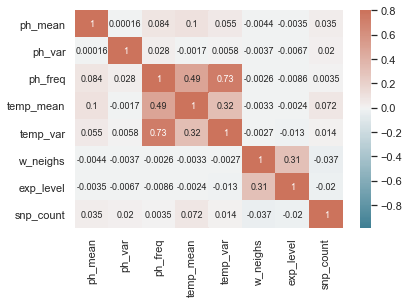

In [82]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)

ax = sns.heatmap(ndf.corr(), cmap=cmap, vmin=-0.99, vmax=.8, center=0.00, annot=True, annot_kws={"fontsize":9})

No log, no norm

In [83]:
#normalized_df=(ndf-ndf.mean())/ndf.std()
normalized_df=ndf.copy()

In [84]:
#normalized_df=(ndf-ndf.mean())/ndf.std()
normalized_df["w_neighs"]=(normalized_df["w_neighs"]-normalized_df["w_neighs"].mean())/normalized_df["w_neighs"].std()
normalized_df["exp_level"]=(normalized_df["exp_level"]-normalized_df["exp_level"].mean())/normalized_df["exp_level"].std()
normalized_df["snp_count"]=(normalized_df["snp_count"]-normalized_df["snp_count"].mean())/normalized_df["snp_count"].std()

normalized_df["ph_mean"]=(normalized_df["ph_mean"]-normalized_df["ph_mean"].mean())/normalized_df["ph_mean"].std()
normalized_df["ph_var"]=(normalized_df["ph_var"]-normalized_df["ph_var"].mean())/normalized_df["ph_var"].std()
normalized_df["ph_freq"]=(normalized_df["ph_freq"]-normalized_df["ph_freq"].mean())/normalized_df["ph_freq"].std()
normalized_df["temp_mean"]=(normalized_df["temp_mean"]-normalized_df["temp_mean"].mean())/normalized_df["temp_mean"].std()
normalized_df["temp_var"]=(normalized_df["temp_var"]-normalized_df["temp_var"].mean())/normalized_df["temp_var"].std()




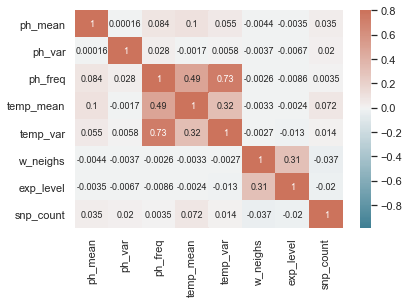

In [85]:
ax = sns.heatmap(normalized_df.corr(), cmap=cmap, vmin=-0.99, vmax=.8, center=0.00, annot=True, annot_kws={"fontsize":9})

No log, norm

In [86]:
ndf[['log_ph_freq', "log_ph_var", "log_ph_mean", "log_temp_mean", "log_temp_var",'log_w_neighs', 'log_exp_level', 'log_snp_count']] = np.log(ndf[["ph_freq", "ph_var", "ph_mean", "temp_mean", "temp_var",'w_neighs', 'exp_level', 'snp_count']].replace(0, np.nan))
log_ndf=ndf[["log_ph_freq", "log_ph_var", "log_ph_mean", "log_temp_mean", "log_temp_var",'log_w_neighs', 'log_exp_level', 'log_snp_count']]

/Users/csengepetak/miniconda3/envs/ds1/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


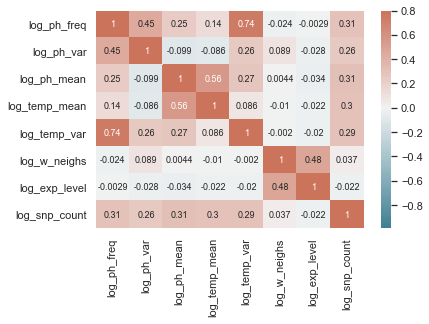

In [87]:
ax = sns.heatmap(log_ndf.corr(), cmap=cmap, vmin=-0.99, vmax=.8, center=0.00, annot=True, annot_kws={"fontsize":9})

Log, no norm

In [88]:
#normalized_df[['log_ph_freq', "log_ph_var", "log_ph_mean", "log_temp_mean", "log_temp_var",'log_w_neighs', 'log_exp_level', 'log_snp_count']] = np.log(normalized_df[["ph_freq", "ph_var", "ph_mean", "temp_mean", "temp_var",'w_neighs', 'exp_level', 'snp_count']].replace(0, np.nan))
#log_ndf=normalized_df[["log_ph_freq", "log_ph_var", "log_ph_mean", "log_temp_mean", "log_temp_var",'log_w_neighs', 'log_exp_level', 'log_snp_count']]

In [89]:
#ax = sns.heatmap(log_ndf.corr(), cmap=cmap, vmin=-0.99, vmax=.8, center=0.00, annot=True, annot_kws={"fontsize":9})

In [90]:
sub=log_ndf[["log_exp_level", "log_w_neighs"]]
sub=sub.dropna()

In [91]:
x = sub["log_exp_level"].to_numpy()
x = x.reshape((-1, 1))
y = sub["log_w_neighs"].to_numpy()

In [92]:
reg = LinearRegression().fit(x,y)

In [93]:
reg.score(x, y) #R squared

0.2305009832843945

In [94]:
reg.coef_ #slope

array([0.20688914])

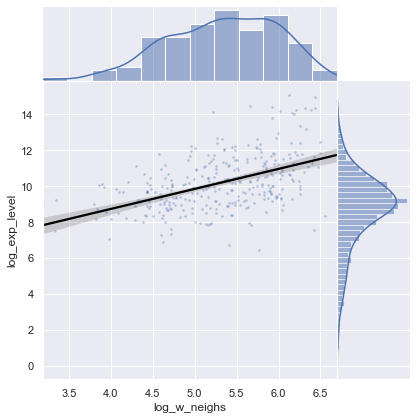

In [95]:
sns.jointplot(
    x='log_w_neighs', 
    y='log_exp_level', 
    data=log_ndf,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
);

/Users/csengepetak/miniconda3/envs/ds1/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/csengepetak/miniconda3/envs/ds1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/csengepetak/miniconda3/envs/ds1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explici

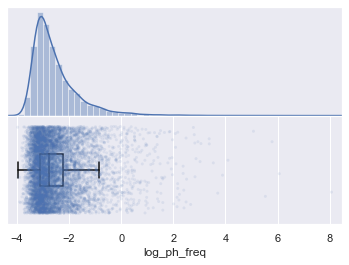

In [96]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    log_ndf['log_ph_freq'], 
    ax=axs[0]
)
sns.stripplot(
    log_ndf['log_ph_freq'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.1
)
sns.boxplot(
    log_ndf['log_ph_freq'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
    color=".05"
)

# Align axes
spacer = np.max(log_ndf['log_ph_freq']) * 0.05
xmin = np.min(log_ndf['log_ph_freq']) - spacer
xmax = np.max(log_ndf['log_ph_freq']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

In [97]:
#log_ndf=ndf[["log_ph_freq", "log_ph_var", "log_ph_mean", "log_temp_mean", "log_temp_var",'log_w_neighs', 'log_exp_level', 'log_snp_count']]

In [98]:
#normalized_df=(ndf-ndf.mean())/ndf.std()
#log_ndf["log_w_neighs"]=(log_ndf["log_w_neighs"]-log_ndf["log_w_neighs"].mean())/log_ndf["log_w_neighs"].std()
#log_ndf["log_exp_level"]=(log_ndf["log_exp_level"]-log_ndf["log_exp_level"].mean())/log_ndf["log_exp_level"].std()
#log_ndf["log_snp_count"]=(log_ndf["log_snp_count"]-log_ndf["log_snp_count"].mean())/log_ndf["log_snp_count"].std()

#log_ndf["log_ph_mean"]=(log_ndf["log_ph_mean"]-log_ndf["log_ph_mean"].mean())/log_ndf["log_ph_mean"].std()
#log_ndf["log_ph_var"]=(log_ndf["log_ph_var"]-log_ndf["log_ph_var"].mean())/log_ndf["log_ph_var"].std()
#log_ndf["log_ph_freq"]=(log_ndf["log_ph_freq"]-log_ndf["log_ph_freq"].mean())/log_ndf["log_ph_freq"].std()
#log_ndf["log_temp_mean"]=(log_ndf["log_temp_mean"]-log_ndf["log_temp_mean"].mean())/log_ndf["log_temp_mean"].std()
#log_ndf["log_temp_var"]=(log_ndf["log_temp_var"]-log_ndf["log_temp_var"].mean())/log_ndf["log_temp_var"].std()




In [99]:
#ax = sns.heatmap(log_ndf.corr(), cmap=cmap, vmin=-0.99, vmax=.8, center=0.00, annot=True, annot_kws={"fontsize":9})

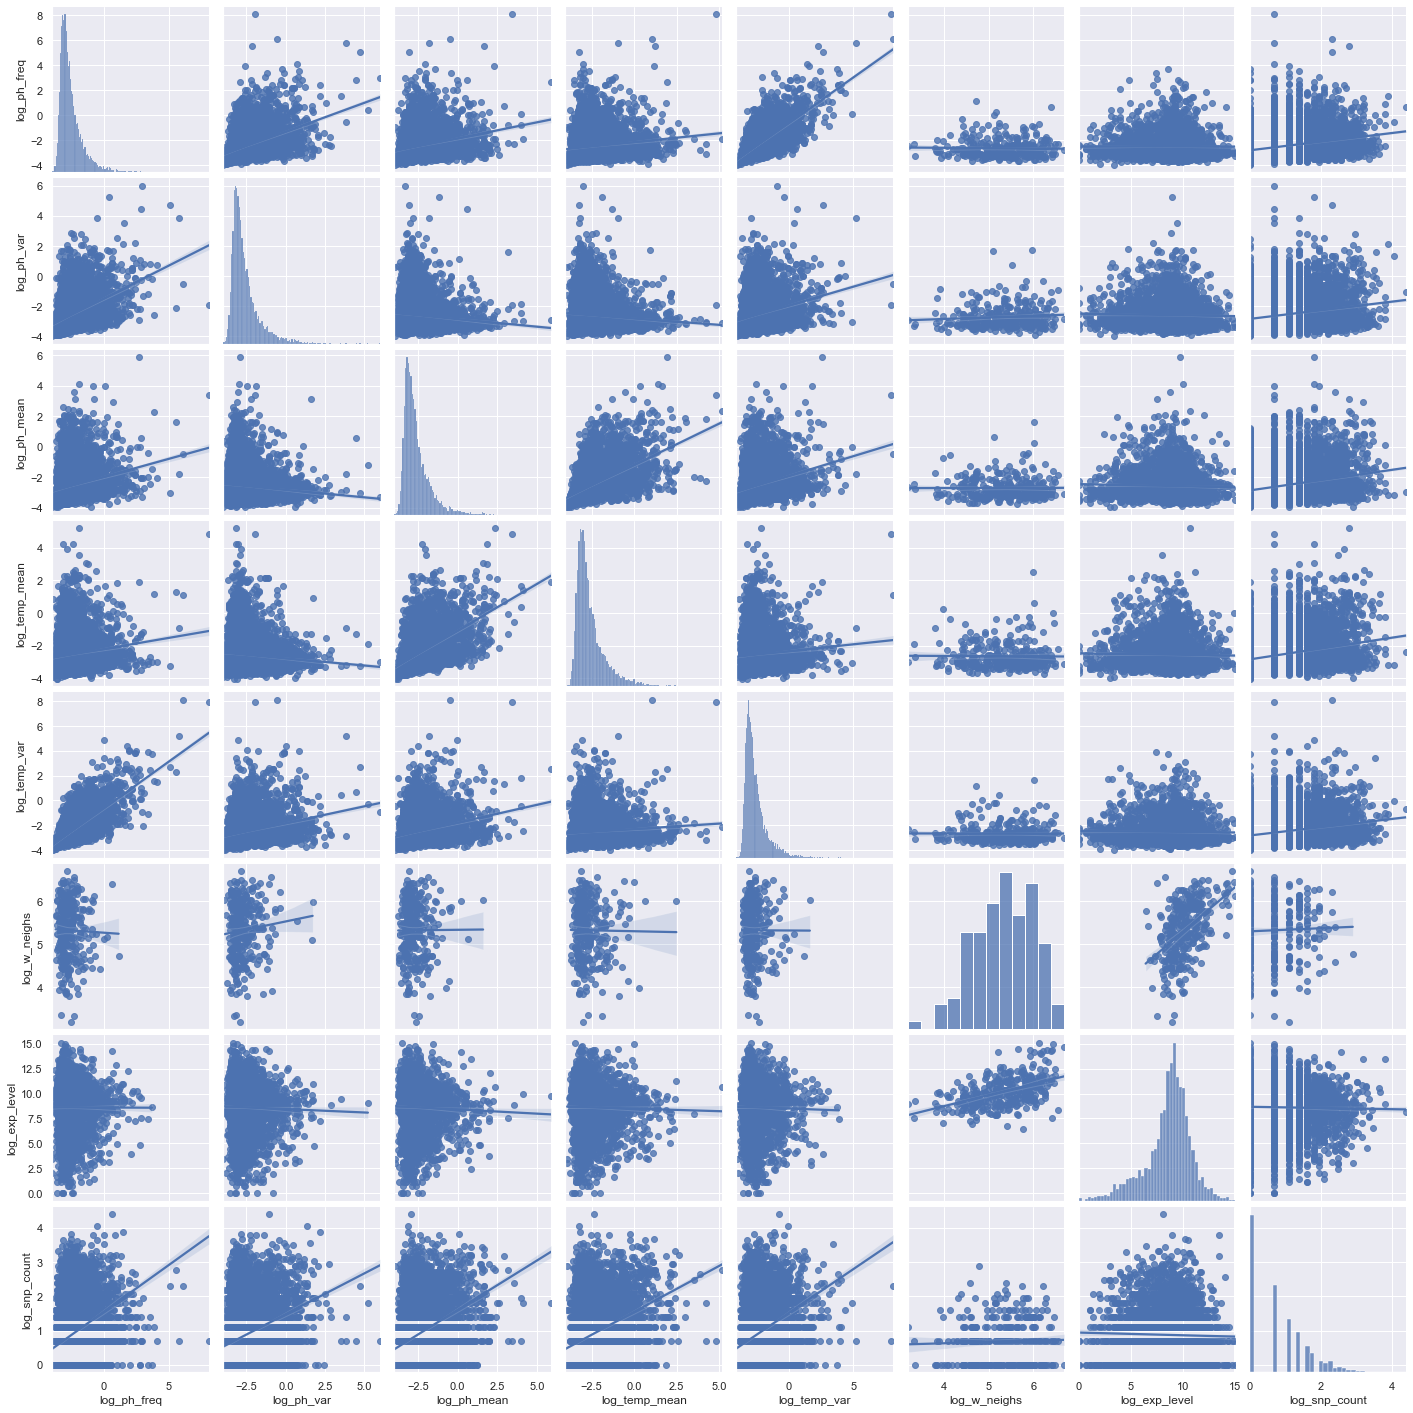

In [100]:
sns.pairplot(log_ndf, kind="reg")

In [101]:
log_ndf

,log_ph_freq,log_ph_var,log_ph_mean,log_temp_mean,log_temp_var,log_w_neighs,log_exp_level,log_snp_count
0,-2.424753,-2.867761,-1.767379,-2.500414,-2.299689,NaN,NaN,0.693147
28114,-1.337085,-2.459520,-0.884138,0.386350,-1.708595,NaN,NaN,2.302585
28124,0.542266,-1.036483,-2.087796,-2.420187,-1.404336,NaN,NaN,2.833213
28143,-1.546557,-1.533125,-3.425961,-3.440770,-2.685956,NaN,NaN,2.397895
28148,-2.111469,-2.244411,-3.059482,-3.240943,-1.123653,NaN,NaN,2.197225
...,...,...,...,...,...,...,...,...
61501,-3.113930,-3.125249,-3.289754,-3.172159,-3.218826,NaN,NaN,0.000000
61502,-2.392247,-1.834959,-3.423842,-3.259359,-2.748810,NaN,NaN,0.000000
61503,-3.168040,-2.642487,-2.048641,-2.884620,-3.081900,NaN,9.104646,0.000000
61504,-3.334146,-3.425562,-2.861464,-3.079310,-2.288879,NaN,NaN,0.000000


# let's start with multiple linear regression model trying to predict bayenv factor

In [110]:
train, val = train_test_split(log_ndf.dropna(), test_size=0.2, random_state=42)

In [111]:
X_train = train[["log_w_neighs", 'log_exp_level', 'log_snp_count']]
y_train = train["log_ph_mean"]

In [112]:
X_val = val[["log_w_neighs", 'log_exp_level', 'log_snp_count']]
y_val = val["log_ph_mean"]

In [113]:
linear_model = LinearRegression()

In [114]:
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_val)

In [116]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    return math.sqrt(metrics.mean_squared_error(actual, predicted))

In [117]:
training_error = rmse(y_train, y_fitted)
val_error = rmse(y_val, y_predicted)
(training_error, val_error)

(0.6990843893753953, 0.6038217646672174)

/Users/csengepetak/miniconda3/envs/ds1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


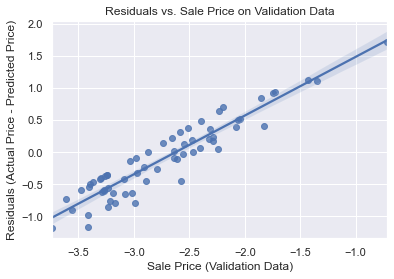

In [118]:
residuals = y_val - y_predicted
ax = sns.regplot(y_val, residuals)
ax.set_xlabel('Sale Price (Validation Data)')
ax.set_ylabel('Residuals (Actual Price - Predicted Price)')
ax.set_title("Residuals vs. Sale Price on Validation Data");

### We see that there is not much going on here, so we can't do a mulitple linear regression model!
Let's try classification then! (More explanation will be provided in the update)

In [239]:
ndf=new_df[["ph_mean","ph_var","ph_freq","temp_mean","temp_var", "w_neighs", 'exp_level', 'snp_count']]
bayenvs = ["ph_mean", "ph_var","temp_mean","temp_var", "ph_freq"]
for b in bayenvs:
    temp=ndf[b].to_numpy()
    score=np.percentile(temp, 90)
    ndf[b+"_cat"]=np.where((temp >= score), 'above', 'below')
ph_var_df=ndf[["ph_var_cat", "w_neighs", 'exp_level', 'snp_count']]

<ipython-input-239-b1242065b0b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[b+"_cat"]=np.where((temp >= score), 'above', 'below')


In [240]:
training=ph_var_df.copy()
training=training.dropna()

test=training.sample(n=100, random_state=1)

In [241]:
training


,ph_var_cat,w_neighs,exp_level,snp_count
28164,below,0.0,22756.0,27.0
28188,below,0.0,75336.0,8.0
28215,below,0.0,1475.0,7.0
28243,above,0.0,840.0,4.0
28256,below,0.0,69.0,13.0
...,...,...,...,...
61472,below,0.0,1755.0,1.0
61480,below,0.0,82829.0,1.0
61493,below,0.0,15705.0,1.0
61503,below,0.0,8997.0,1.0


In [242]:
train, val = train_test_split(training, test_size=0.2, random_state=42)
X_train = train[["w_neighs","exp_level","snp_count"]].values
Y_train = train["ph_var_cat"].values

In [243]:
model = LogisticRegression(random_state=42).fit(X_train, Y_train)
model.predict(X_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.8949249463902788


/Users/csengepetak/miniconda3/envs/ds1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [244]:
X_val=val[["w_neighs","exp_level","snp_count"]].values
Y_val=val["ph_var_cat"].values

In [245]:
val_accuracy = model.score(X_val, Y_val)

print("Validation Accuracy: ", val_accuracy)

Validation Accuracy:  0.8842857142857142


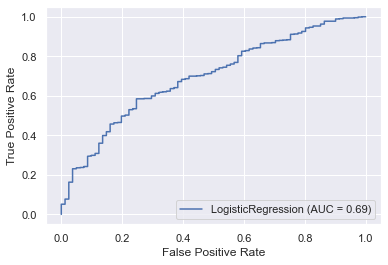

In [246]:
metrics.plot_roc_curve(model, X_val, Y_val)

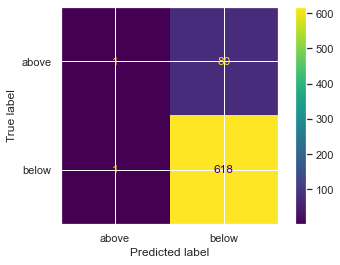

In [247]:
display=plot_confusion_matrix(model, X_val, Y_val)

### This is because my data is very imbalanced!

You can add copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement), or
You can delete instances from the over-represented class, called under-sampling

but it still wasn't working because now individually in the 5 bayenv there are too few examples of above. so let's try to aggregate data! and just predict if there would be a bayenv factor at all!

In [7]:
ndf=new_df[["ph_mean","ph_var","ph_freq","temp_mean","temp_var", "w_neighs", 'exp_level', 'snp_count']]
bayenvs = ["ph_mean", "ph_var","temp_mean","temp_var", "ph_freq"]
for b in bayenvs:
    temp=ndf[b].to_numpy()
    score=np.percentile(temp, 90)
    ndf[b+"_cat"]=np.where((temp >= score), 1, 0)
#ph_mean_df=ndf[["ph_var_cat", "w_neighs", 'exp_level', 'snp_count']]

<ipython-input-7-1b11392d3172>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[b+"_cat"]=np.where((temp >= score), 1, 0)


In [8]:
bayenvs=["ph_mean_cat","ph_var_cat","temp_mean_cat", "temp_var_cat","ph_freq_cat"]

In [9]:
ndf["finals"]=np.sum(np.array([ndf[col].values for col in bayenvs] ),axis=0)>0
ndf["finals"]=ndf["finals"].apply(lambda x : 0 if x==False else 1)

<ipython-input-9-68486768c901>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf["finals"]=np.sum(np.array([ndf[col].values for col in bayenvs] ),axis=0)>0
<ipython-input-9-68486768c901>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf["finals"]=ndf["finals"].apply(lambda x : 0 if x==False else 1)


In [10]:
training=ndf.copy()
training=training.dropna()

In [11]:
aboves=training[training["finals"]==1]

In [12]:
belows=training[training["finals"]==0].sample(n=len(aboves), random_state=1)

In [13]:
new_train = pd.concat([belows,aboves])

In [14]:
#normalise between 0-1

In [15]:
new_train["w_neighs"]=new_train["w_neighs"].apply(lambda x: (x-new_train["w_neighs"].min())/(new_train["w_neighs"].max()-new_train["w_neighs"].min()))

In [16]:
new_train["exp_level"]=new_train["exp_level"].apply(lambda x: (x-new_train["exp_level"].min())/(new_train["exp_level"].max()-new_train["exp_level"].min()))

In [17]:
new_train["snp_count"]=new_train["snp_count"].apply(lambda x: (x-new_train["snp_count"].min())/(new_train["snp_count"].max()-new_train["w_neighs"].min()))


In [18]:
new_train

,ph_mean,ph_var,ph_freq,temp_mean,temp_var,w_neighs,exp_level,snp_count,ph_mean_cat,ph_var_cat,temp_mean_cat,temp_var_cat,ph_freq_cat,finals
49959,0.061911,0.027895,0.044951,0.098383,0.038776,0.0,6.146737e-04,0.000000,0,0,0,0,0,0
52781,0.061042,0.050353,0.038325,0.067118,0.040917,0.0,1.232476e-04,0.000000,0,0,0,0,0,0
53535,0.031491,0.029350,0.042267,0.030098,0.044362,0.0,3.128111e-07,0.012346,0,0,0,0,0,0
51928,0.047091,0.040935,0.038015,0.034021,0.057183,0.0,4.172587e-03,0.012346,0,0,0,0,0,0
44065,0.057134,0.060141,0.084212,0.062213,0.061667,0.0,1.015072e-03,0.012346,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61199,0.137480,0.039669,0.251100,0.270940,0.468340,0.0,5.763231e-03,0.037037,0,0,1,1,1,1
61272,0.053864,0.367010,0.085734,0.068846,0.155260,0.0,3.659889e-05,0.000000,0,1,0,0,0,1
61376,0.032749,1.170400,0.203540,0.038621,0.074431,0.0,9.264963e-02,0.012346,0,1,0,0,0,1
61398,0.120680,0.049798,0.034763,0.387330,0.036498,0.0,2.390752e-02,0.000000,0,0,1,0,0,1


In [434]:
test=new_train.sample(n=100, random_state=1)

In [435]:
train, val = train_test_split(new_train, test_size=0.1, random_state=42)
X_train = train[["exp_level","snp_count","w_neighs"]].values
Y_train = train["finals"].values

In [436]:
model = LogisticRegression(random_state=42).fit(X_train, Y_train)
model.predict(X_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.6935483870967742


In [437]:
model.coef_

array([[-0.21534278, 10.11474385, -0.8241722 ]])

In [438]:
X_val=val[["exp_level","snp_count","w_neighs"]].values
Y_val=val["finals"].values

In [439]:
val_accuracy = model.score(X_val, Y_val)

print("Validation Accuracy: ", val_accuracy)

Validation Accuracy:  0.6446280991735537


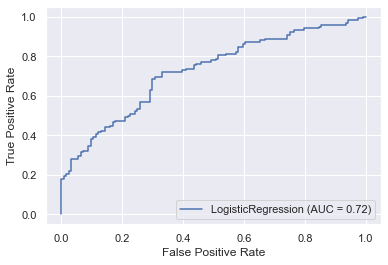

In [440]:
metrics.plot_roc_curve(model, X_val, Y_val)

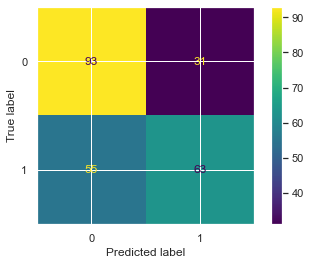

In [441]:
display=plot_confusion_matrix(model, X_val, Y_val)

In [55]:
# pretty sajt...
#well then it seems that you cannot predict LINEARLY the label given the inputs

# KNeighbors

In [56]:
X = new_train[["exp_level","snp_count","w_neighs"]].values
y = new_train["finals"].values

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [60]:
y_pred = classifier.predict(X_test)

In [61]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[169  67]
 [ 75 172]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       236
           1       0.72      0.70      0.71       247

    accuracy                           0.71       483
   macro avg       0.71      0.71      0.71       483
weighted avg       0.71      0.71      0.71       483



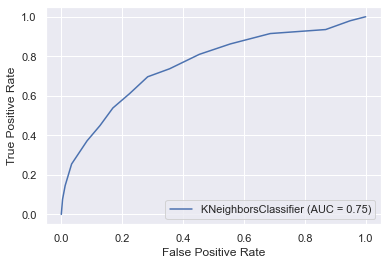

In [62]:
metrics.plot_roc_curve(classifier, X_test, y_test)

In [63]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

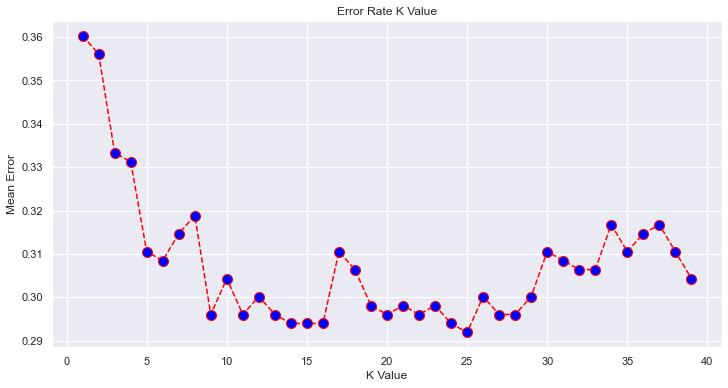

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# PCA

In [304]:
# Separating out the features

x = new_train[["exp_level","snp_count","w_neighs"]].values# Separating out the target
y = new_train["finals"].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [305]:
x

array([[-0.22570275, -0.65916834, -0.25763307],
       [-0.23706718, -0.65916834, -0.25763307],
       [-0.23991009, -0.43273216, -0.25763307],
       ...,
       [ 1.90264356, -0.43273216, -0.25763307],
       [ 0.31295401, -0.65916834, -0.25763307],
       [-0.2194382 , -0.65916834, -0.25763307]])

In [306]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [307]:
finalDf = pd.concat([principalDf, training[['finals']].reset_index().drop("index",axis=1)], axis = 1)

In [308]:
finalDf

,principal component 1,principal component 2,finals
0,-0.226151,-0.699795,1
1,-0.233992,-0.702108,0
2,-0.274067,-0.481126,1
3,-0.207499,-0.461491,1
4,-0.257877,-0.476350,1
...,...,...,...
3493,NaN,NaN,0
3494,NaN,NaN,0
3495,NaN,NaN,0
3496,NaN,NaN,0


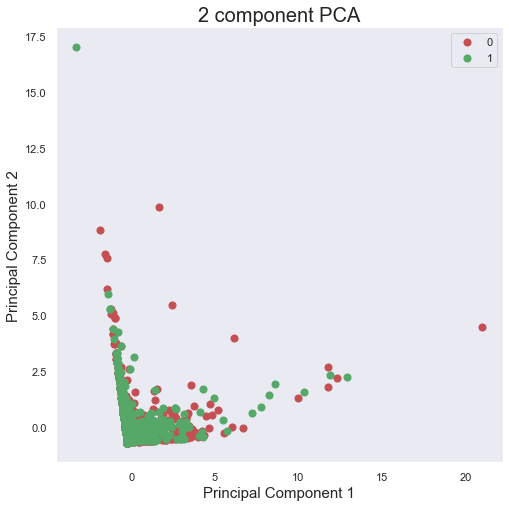

In [309]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['finals'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Support Vector Machine

In [46]:
X = new_train[["exp_level","snp_count","w_neighs"]].values
y = new_train["finals"].values

In [47]:
new_train

,ph_mean,ph_var,ph_freq,temp_mean,temp_var,w_neighs,exp_level,snp_count,ph_mean_cat,ph_var_cat,temp_mean_cat,temp_var_cat,ph_freq_cat,finals
49959,0.061911,0.027895,0.044951,0.098383,0.038776,0.0,6.146737e-04,0.000000,0,0,0,0,0,0
52781,0.061042,0.050353,0.038325,0.067118,0.040917,0.0,1.232476e-04,0.000000,0,0,0,0,0,0
53535,0.031491,0.029350,0.042267,0.030098,0.044362,0.0,3.128111e-07,0.012346,0,0,0,0,0,0
51928,0.047091,0.040935,0.038015,0.034021,0.057183,0.0,4.172587e-03,0.012346,0,0,0,0,0,0
44065,0.057134,0.060141,0.084212,0.062213,0.061667,0.0,1.015072e-03,0.012346,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61199,0.137480,0.039669,0.251100,0.270940,0.468340,0.0,5.763231e-03,0.037037,0,0,1,1,1,1
61272,0.053864,0.367010,0.085734,0.068846,0.155260,0.0,3.659889e-05,0.000000,0,1,0,0,0,1
61376,0.032749,1.170400,0.203540,0.038621,0.074431,0.0,9.264963e-02,0.012346,0,1,0,0,0,1
61398,0.120680,0.049798,0.034763,0.387330,0.036498,0.0,2.390752e-02,0.000000,0,0,1,0,0,1


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [49]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
y_pred = svclassifier.predict(X_test)

In [51]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[226  15]
 [156  86]]
              precision    recall  f1-score   support

           0       0.59      0.94      0.73       241
           1       0.85      0.36      0.50       242

    accuracy                           0.65       483
   macro avg       0.72      0.65      0.61       483
weighted avg       0.72      0.65      0.61       483



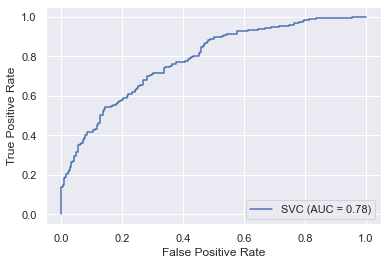

In [52]:
metrics.plot_roc_curve(svclassifier, X_test, y_test)

In [35]:
svclassifier = SVC(kernel='poly', degree=5)
print(1)
svclassifier.fit(X_train, y_train)
print(2)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1
2
[[235   2]
 [209  37]]
              precision    recall  f1-score   support

           0       0.53      0.99      0.69       237
           1       0.95      0.15      0.26       246

    accuracy                           0.56       483
   macro avg       0.74      0.57      0.47       483
weighted avg       0.74      0.56      0.47       483



In [53]:
svclassifier = SVC(kernel='rbf')
print(1)
svclassifier.fit(X_train, y_train)
print(2)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1
2
[[177  64]
 [ 78 164]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       241
           1       0.72      0.68      0.70       242

    accuracy                           0.71       483
   macro avg       0.71      0.71      0.71       483
weighted avg       0.71      0.71      0.71       483



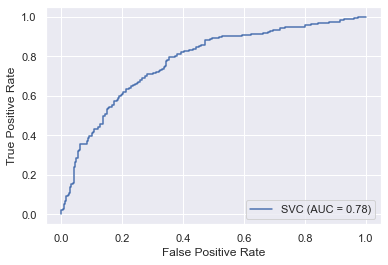

In [54]:
metrics.plot_roc_curve(svclassifier, X_test, y_test)

In [34]:
svclassifier = SVC(kernel='sigmoid')
print(1)
svclassifier.fit(X_train, y_train)
print(2)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1
2
[[168  69]
 [102 144]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       237
           1       0.68      0.59      0.63       246

    accuracy                           0.65       483
   macro avg       0.65      0.65      0.65       483
weighted avg       0.65      0.65      0.64       483



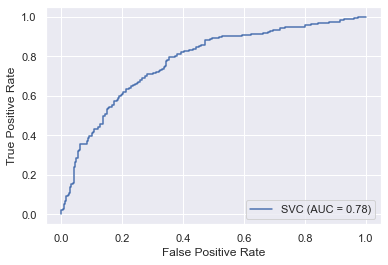

In [55]:
metrics.plot_roc_curve(svclassifier, X_test, y_test)